교육 수준 별로 나이와 임금의 관계를 탐색하기 위한 시각화를 구현하고, 시각화 결과에서 알 수 있는 사
실을 설명하세요

In [2]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [3]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [4]:
origin = load_data('wage')
origin

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


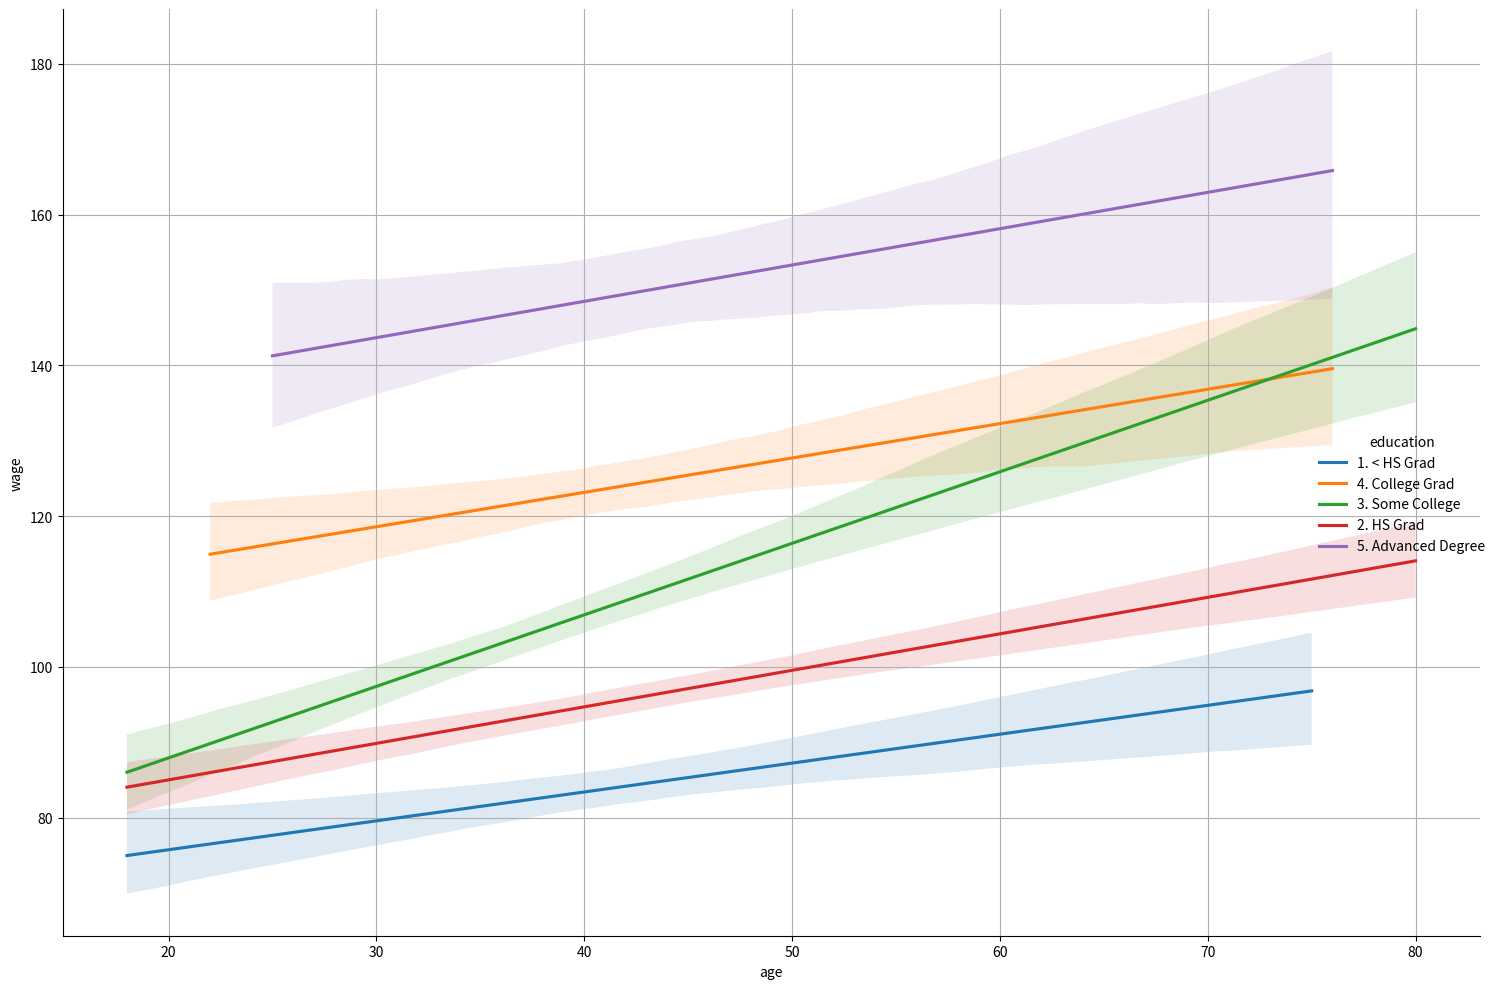

In [15]:
width_px = 1500
height_px = 1000
figsize = (width_px/ my_dpi, height_px/ my_dpi)
#rows=1
#cols =1

g =sb.lmplot(data=origin, x='age',y='wage', hue='education',scatter=False)

g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()


plt.tight_layout()
plt.show()
plt.close()

강사님 답안:전반적으로 나이가 많아질수록 임금이 상승하는 경향을 보인다.
2.교육 수준이 높을 수록 임금이 더 높은 경향을 보인다.


내 답안: 대학교를 졸업하기 전 (1,2,3)은 임금의 시작이 100만원 이하 이고, age가 40에서 임금의 격차가 나기 시작한다.
대학교를 졸업한 4,5번은 시작부터 100만원 이상이며, 3번 임금의 기울기가 제일 크고 상승률이 높다.


2번 문제: 인종(race)별로 직업군(jobclass)에 따른 임금(wage) 분포를 비교할 수 있는 시각화를 구현하고, 시각
화 결과에서 알 수 있는 사실을 설명하세요.

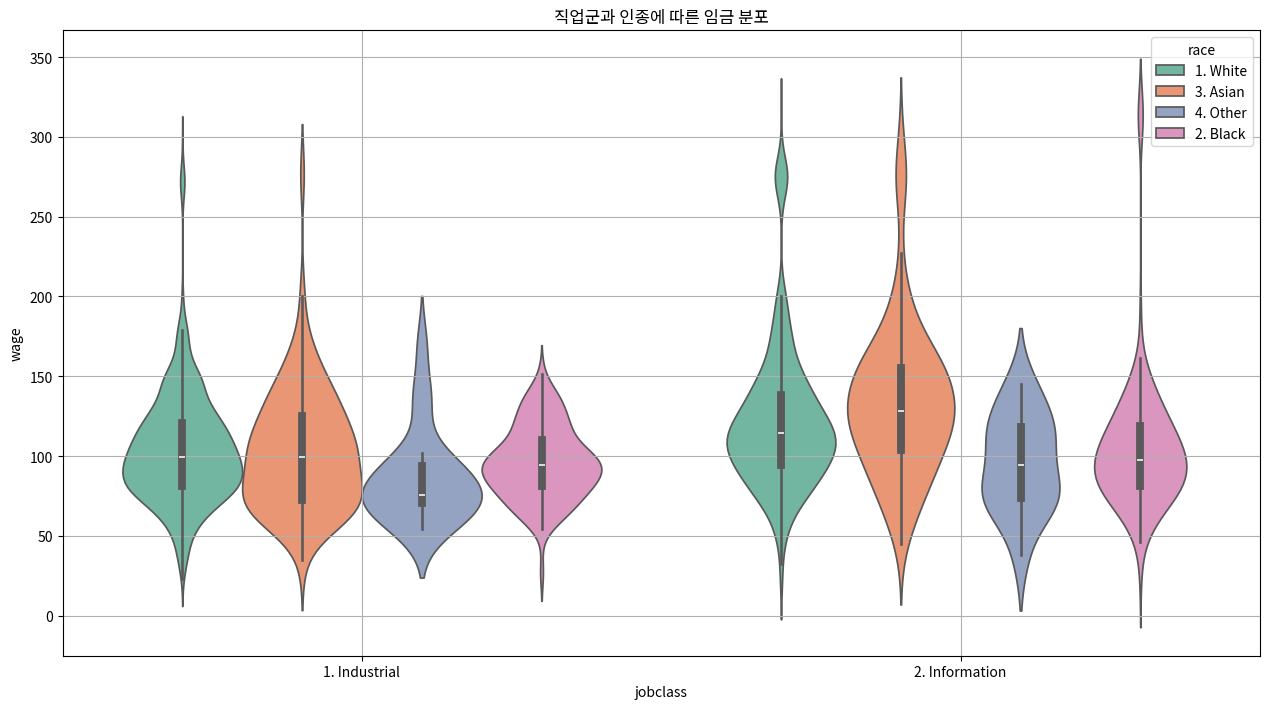

In [ ]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols,figsize=figsize, dpi=my_dpi)

sb.violinplot(data=origin,x='jobclass', y='wage',hue='race', palette='Set2')
ax.set_title("직업군과 인종에 따른 임금 분포")
ax.grid(True)
    

plt.tight_layout()
plt.show()
plt.close()

사무직 직군이 생산직 직군보다 전반적으로 임금 중앙값이 높게 나타난다.
white와 Asian 인종은 두 직군 모두에서 'Black' 이나 'Other'인종보다 높은 임금 분포를 보인다.
'Asian'인종은 'Information' 직군에서 특히 높은 임금(200 이상)을 받는 비중이 다른 인종에 비해 두드러진다.
'Blcak' 인종은 두 직군 모두에서 임금 분포가 비교적 낮은 쪽에 집중되어 있다.

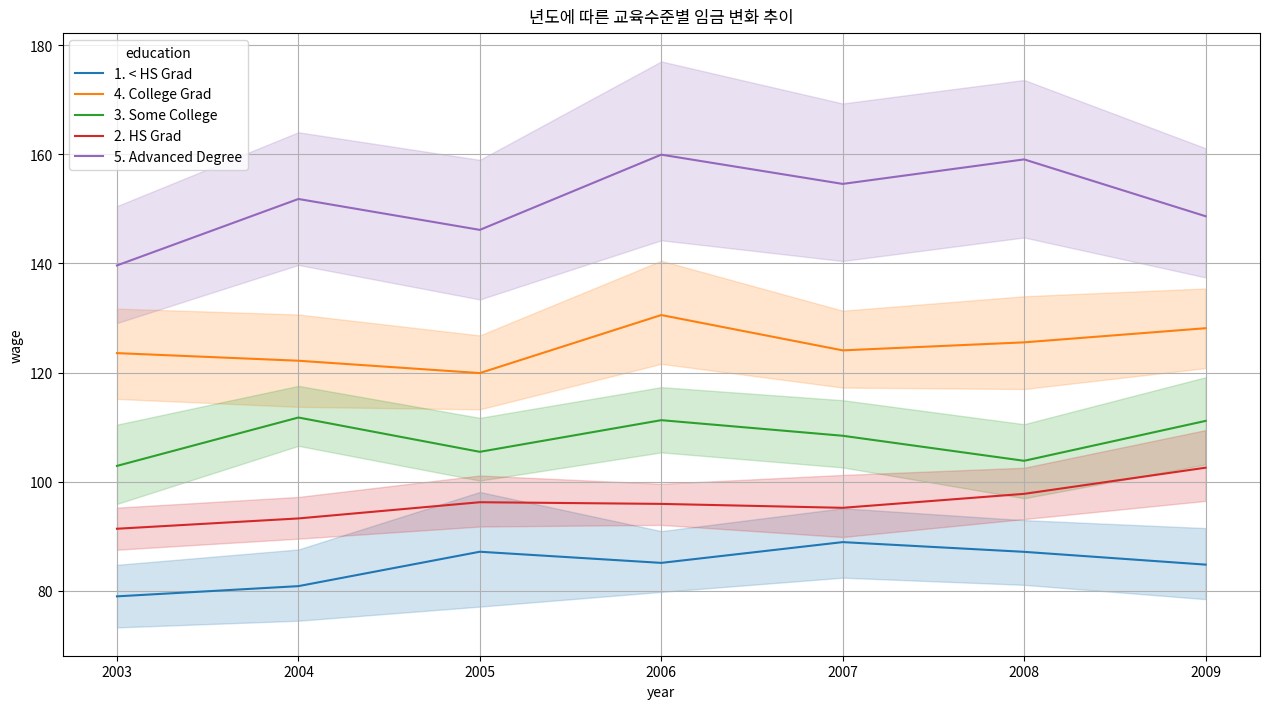

In [29]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.lineplot(data=origin, x="year",y="wage",hue="education")

ax.set_title("년도에 따른 교육수준별 임금 변화 추이",  fontsize=12, pad=8)
ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

교육 수준이 높을수록 임금 수준이 높게 나타나는 서열이 뚜렷하게 유지된다.

대학원 졸업 집단의 경우 임금이 다른 집단에 비해 월등히 높으며, 연도에 따른 임금 상승률도 가장 가파르다.또한,2008년까지 대체로 임금이 상승하다가 2009년도에 하락하고 있다.
이는 2008년 금융위기의 영향인 것으로 보인다.
고등학교 미만 집단은 다른 집단에 비해 임금 수준이 가장 낮고,
연도에 따른 임금 변화도 거의 없다.


